# Review of Basic Statistical Operations
In this notebook, I review the basic statistical operations required to understand most of what I cover in the Working With Data section. The review covers:
1. Mean
1. Variance
1. Covariance
1. Correlation Coefficient
1. Standard Deviation
1. Z-Score

We compute each of these on an example data set _X_ that looks like this:

<table>
<tbody>
  <tr>
    <th>x</th>
    <td>0</td>
    <td>2</td>
    <td>4</td>
    <td>5</td>
    <td>7</td>
    <td>8</td>
    <td>10</td>
  </tr>
  <tr>
    <th>y</th>
    <td>4</td>
    <td>3</td>
    <td>1</td>
    <td>1</td>
    <td>2</td>
    <td>1</td>
    <td>0</td>
  </tr>
</tbody>
</table>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

c:\users\omer\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\omer\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\users\omer\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
X = np.array([[0, 2, 4, 5, 7, 8, 10], [4, 3, 1, 1, 2, 1, 0]])
X

array([[ 0,  2,  4,  5,  7,  8, 10],
       [ 4,  3,  1,  1,  2,  1,  0]])

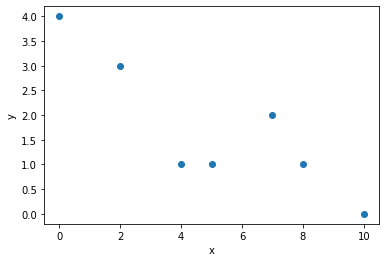

In [3]:
plt.scatter(X[0, :], X[1, :])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1. Mean

The mean ***is the average of a data set***.

$$
E(x) = \frac{1}{n} \sum_{i=1} ^{n} x_i 
$$

$E(x)$ = Arithmetic Mean

$n$ = total number of samples

$x_i$ = dataset value

In [4]:
n = X.shape[1]
n

7

In [5]:
def mean(dataset):
    s = 0
    size = len(dataset)
    for item in dataset:
        s += item
    E = s/size
    return float("{:.2f}".format(E))  # To limit float to two decimal places.

In [6]:
E_x = mean(X[0])
E_x

5.14

In [7]:
E_y = mean(X[1])
E_y

1.71

## 2. Variance

Variance is **a measure of how data points differ from the mean**.

$$
var(x) = \frac{1}{n-1} \sum_{i=1} ^{n} (x_i -\bar{x})^2
$$

$var(x)$ = Variance

$n$ = total number of samples

$x_i$ = dataset value

$\bar{x}$ = Arithmetic Mean

In [8]:
def variance(dataset, E):
    s = 0
    size = len(dataset)
    for item in dataset:
        s += (item - E)**2
    V = s / (size - 1)
    return float("{:.2f}".format(V))  # To limit float to two decimal places.

In [9]:
V_x = variance(X[0], E_x)
V_x

12.14

In [10]:
V_y = variance(X[1], E_y)
V_y

1.9

## 3. Covariance

Covariance **measures the direction of the relationship between two variables**.

$$
cov(x, y) = \frac{1}{n-1} \sum_{i=1} ^{n} (x_i -\bar{x}) (y_i -\bar{y})
$$

$cov(x,y)$ = Covariance

$n$ = total number of samples

$x_i, y_i$ = dataset values

$\bar{x},\bar{y}$ = Arithmetic Mean

In [11]:
def covariance(dataset, E_x, E_y):
    s = 0
    size = len(dataset[0])
    for i in range(0, size):
        s += (dataset[0, i] - E_x) * (dataset[1, i] - E_y)
    cov = s / (size - 1)
    return float("{:.2f}".format(cov)) # To limit float to two decimal places.

In [12]:
cov = covariance(X, E_x, E_y)
cov

-4.12

## 4. Correlation Coefficient

A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between two variables.

$$
corr(x, y) = \frac{cov(x,y)}{\sqrt{var(x)}{\sqrt{var(y)}}}
$$

$corr(x,y)$ = Correlation Coefficient

$cov(x,y)$ = Covariance

$var(x)$ = Variance of x

$var(y)$ = Variance of y


In [13]:
def correlation_coefficient(dataset, cov, V_x, V_y):
    corr = cov/((math.sqrt(V_x))*(math.sqrt(V_y)))
    return float("{:.2f}".format(corr)) # To limit float to two decimal places.

In [14]:
corr = correlation_coefficient(X, cov, V_x, V_y)
corr

-0.86

## Example Problem
And now we see that we got our results right.

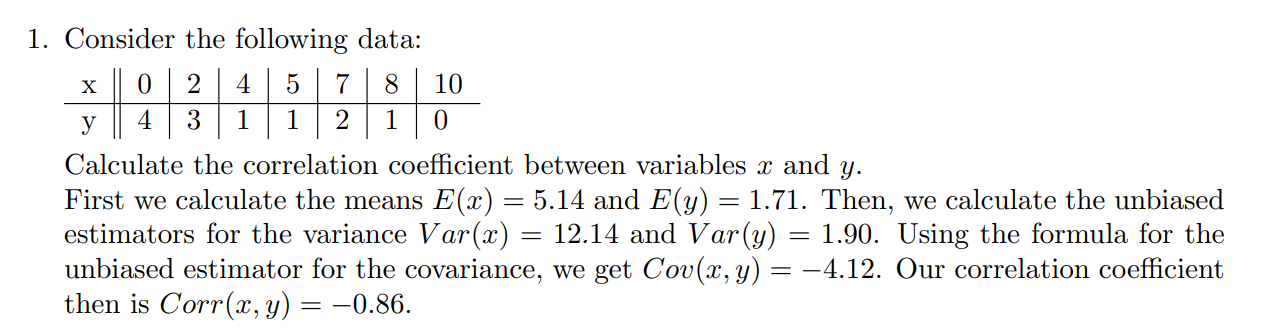

## 5. Standard Deviation

A standard deviation (or σ) is **a measure of how dispersed the data is in relation to the mean**.

$$
\sigma(x) = \sqrt{\frac{\sum_{i=1} ^{n} (x_i-\bar{x})^2}{n}}
$$

$\sigma(x)$ = Standard Deviation

$n$ = total number of samples

$x_i$ = dataset values

$\bar{x}$ = Arithmetic Mean

---

## 6. Z-Score

A z-score, or standard score, is **used for standardizing scores on the same scale by dividing a score's deviation by the standard deviation in a data set**.

$$
z(x_i) = \frac{x-\bar{x}}{\sigma(x)}
$$

$z(x_i)$ = Z-Score for sample *i*

$\sigma(x)$ = Standard Deviation

$x_i$ = dataset values

$\bar{x}$ = Arithmetic Mean

In [15]:
def standard_deviation(dataset, E):
    s = 0
    size = len(dataset)
    for item in dataset:
        s += (item - E)**2
    std = math.sqrt(s/size)
    return float("{:.2f}".format(std)) # To limit float to two decimal places.

In [16]:
std_x = standard_deviation(X[0], E_x)
std_x

3.23

In [17]:
std_y = standard_deviation(X[1], E_y)
std_y

1.28

In [18]:
def z_score(dataset_item, E, std):
    z = (dataset_item - E)/std
    return float("{:.2f}".format(z)) # To limit float to two decimal places.

In [19]:
def standardize(dataset, E, std):
    size = len(dataset[0])
    std_list = np.zeros(shape=(2, 7))
    for i in range(0, size):
        std_list[0, i] = z_score(dataset[0, i], E[0], std[0])
        std_list[1, i] = z_score(dataset[1, i], E[1], std[1])
    return std_list

In [20]:
std_list = standardize(X, [E_x, E_y], [std_x, std_y])
std_list

array([[-1.59, -0.97, -0.35, -0.04,  0.58,  0.89,  1.5 ],
       [ 1.79,  1.01, -0.55, -0.55,  0.23, -0.55, -1.34]])

### Notice the mean and standard deviation after Standardization of Dataset are now 0 and 1 respectively.

In [21]:
E2_x = mean(std_list[0])
E2_x

0.0

In [22]:
E2_y = mean(std_list[1])
E2_y

0.01

In [23]:
V2_x = variance(std_list[0], E2_x)
V2_x

1.16

In [24]:
V2_y = variance(std_list[1], E2_y)
V2_y

1.16

### The Standardized Dataset

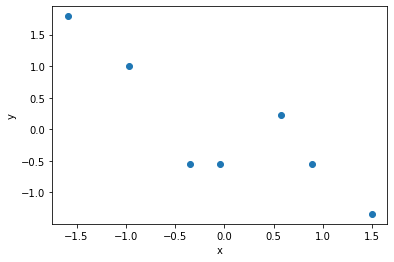

In [25]:
plt.scatter(std_list[0, :], std_list[1, :])
plt.xlabel('x')
plt.ylabel('y')
plt.show()